In [1]:
import pandas as pd
import numpy as np
import altair as alt
import glob
%matplotlib inline

# Exploring the Kaggle data

## Train Data

In [57]:
kaggle_train = pd.read_csv("../../data/raw/kaggle/train.csv",index_col="Date")
kaggle_train.set_index(pd.to_datetime(kaggle_train.index),inplace=True)

In [58]:
kaggle_train.head()

,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
Date,,,,,,,,,,,
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [59]:
kaggle_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10506 entries, 2007-05-29 to 2013-09-26
Data columns (total 11 columns):
Address                   10506 non-null object
Species                   10506 non-null object
Block                     10506 non-null int64
Street                    10506 non-null object
Trap                      10506 non-null object
AddressNumberAndStreet    10506 non-null object
Latitude                  10506 non-null float64
Longitude                 10506 non-null float64
AddressAccuracy           10506 non-null int64
NumMosquitos              10506 non-null int64
WnvPresent                10506 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 984.9+ KB


In [60]:
kaggle_train.AddressAccuracy.value_counts()

8    4628
9    3980
5    1807
3      91
Name: AddressAccuracy, dtype: int64

In [61]:
kaggle_train.pivot_table(values="NumMosquitos",index="AddressAccuracy",columns="WnvPresent",aggfunc="sum")

WnvPresent,0,1
AddressAccuracy,,
3,377,25
5,39598,3495
8,40243,5554
9,40302,5445


WnvPresent    0  1
Date              
2007-05-29   40  0
2007-06-05  127  0
2007-06-26  216  0
2007-06-29   85  0
2007-07-02  240  0


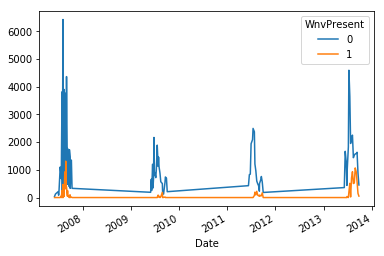

In [63]:
x = kaggle_train.pivot_table(values="NumMosquitos",index="Date",columns="WnvPresent",aggfunc="sum",fill_value=0)
print(x.head())
x.plot()

## Weather data

In [65]:
weather = pd.read_csv("../../data/raw/kaggle/weather.csv")

In [68]:
weather.sample(10)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
830,1,2009-06-17,71,61,66,-3,59,62,0,1,...,BR HZ,0,M,0.0,0.00,29.16,29.88,3.0,36,6.2
451,2,2008-06-11,86,66,76,M,55,64,0,11,...,,M,M,M,0.00,29.34,29.97,9.4,18,10.4
1501,2,2011-05-15,48,42,45,M,38,42,20,0,...,RA BR,M,M,M,0.37,29.19,29.84,18.8,1,18.9
1314,1,2010-08-14,88,72,80,8,69,73,0,15,...,,0,M,0.0,T,29.11,29.82,3.6,25,5.0
109,2,2007-06-24,75,65,70,M,62,65,0,5,...,BR HZ,M,M,M,0.00,29.33,29.96,5.6,10,6.0
1064,1,2009-10-12,48,41,45,-9,36,41,20,0,...,RA DZ BR,0,M,0.0,0.02,29.44,30.18,0.6,19,3.8
602,1,2008-08-26,76,61,69,-1,54,60,0,4,...,,0,M,0.0,0.00,29.29,30.03,7.7,7,8.4
1051,2,2009-10-05,61,42,52,M,42,47,13,0,...,,M,M,M,0.00,29.35,30.04,2.9,9,4.5
2859,2,2014-09-19,76,57,67,M,49,57,0,2,...,,M,M,M,0.00,29.38,30.05,10.0,18,10.5
2005,2,2012-07-22,90,75,83,M,65,71,0,18,...,,M,M,M,0.01,29.38,30.02,5.9,20,6.5
